In [1]:
import folium
import matplotlib as mpl
import missingno as msno
import pandas as pd
import seaborn as sns
from plotnine import *

mpl.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10.0
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.5f}'.format  # 데이터 숫자 출력 서식

# 영업중인 전국 상가업소 동향

In [2]:
# 데이터 읽기
# shop_2022_seoul = pd.read_csv('./data/shop_2022_seoul.csv', sep=',')
# print(shop_2022_seoul.shape)
# shop_2022_seoul.head()

In [3]:
# shop_2022_busan = pd.read_csv('./data/shop_2022_busan.csv', sep=',')
# print(shop_2022_busan.shape)
# shop_2022_busan.head()

In [4]:
# 데이터 합치기
# shop_2022 = pd.concat([shop_2022_seoul, shop_2022_busan], axis=0, ignore_index=True)
# print(shop_2022.shape)
# shop_2022

인덱스 제거된 파일로 저장

In [5]:
# 서울과 부산 데이터만 읽어서 하나의 데이터프레임으로 만든 데이터를 csv 파일로 저장한다.
# csv 파일로 저장할 때 인덱스를 제외하고 저장하려면 index=None 속성을 지정한다.
# shop_2022.to_csv('./data/shop_2022.csv', index=None)

In [6]:
# 파이썬은 Java처럼 {} 블록을 벗어나면 사용한 변수를 삭제하지 못 하므로 계속 메모리를 차지하는 문제가 발생되므로 del 명령을 실행해서 사용하지 않는 변수는 메모리에서 삭제한다.
# del shop_2022_seoul, shop_2022_busan

In [7]:
shop_2022 = pd.read_csv('./data/shop_2022.csv')
print(shop_2022.columns)
shop_2022

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


상가업소번호         상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0       23324279       제중건강원   NaN         D       소매       D10    건강/미용식품   
1       24525909       민속악기사   NaN         D       소매       D04  취미/오락관련소매   
2       24715368       태평양진주   NaN         D       소매       D26   시계/귀금속소매   
3       15554136  김선희꼼꼼국어교습소   NaN         R    학문/교육       R01  학원-보습교습입시   
4       17174175         비지트   NaN         Q       음식       Q01         한식   
...          ...         ...   ...       ...      ...       ...        ...   
519215  18759679       꾸미다뷰티   NaN         F    생활서비스       F01    이/미용/건강   
519216  18759675          본가  꽃게아구         Q       음식       Q01         한식   
519217  18764252        블루워시   하단점         F    생활서비스       F02   세탁/가사서비스   
519218  18743127         몰운대   NaN         D       소매       D03      종합소매점   
519219  18744797          루스   NaN         D       소매       D16      화장품소매   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0         D10A07        건강원   G47216  ...  1156010600100410002034626   
1         D04A09       악기판매   G47593  ...  1120012200101420011000227   
2         D26A01     시계/귀금속   G47830  ...  1111015200100440000000001   
3         R01A01      학원-입시   P85501  ...  1171011100101970003017195   
4         Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   
...          ...        ...      ...  ...                        ...   
519215    F01A02     발/네일케어   S96119  ...  2626010600100400013001989   
519216    Q01A01  한식/백반/한정식   I56111  ...  2623011000100560002048159   
519217    F02A01    세탁소/빨래방   S96912  ...  2638010300108870007035678   
519218    D03A05     수입품판매점   G47190  ...  2638010600116240000000001   
519219    D16A01     화장품판매점   G47813  ...  2635010100108770000000001   

                  건물명                              도로명주소   구우편번호  신우편번호  동정보  \
0                 NaN  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)  150030   7250  NaN   
1                 NaN            서울특별시 성동구 용답5길 2, (용답동)  133849   4803  NaN   
2              금사랑투빌딩        서울특별시 종로구 서순라길 17-10, (봉익동)  110390   3138  NaN   
3                 NaN       서울특별시 송파구 위례성대로12길 31, (방이동)  138834   5640  NaN   
4               상랑의빌딩         서울특별시 서초구 동광로18길 82, (방배동)  137837   6572  NaN   
...               ...                                ...     ...    ...  ...   
519215            NaN         부산광역시 동래구 수안로8번길 35, (수안동)  607823  47887    E   
519216          한신센타뷰  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰)  614800  47272  NaN   
519217           헤를리치   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치)  604853  49306  NaN   
519218  다대동롯데캐슬몰운대아파트        부산광역시 사하구 다대낙조2길 100, (다대동)  604783  49497  104   
519219            NaN         부산광역시 해운대구 신반송로 178, (반송동)  612808  48011  NaN   

        층정보  호정보        경도       위도  
0         1  NaN 126.90717 37.52061  
1       NaN  NaN 127.04902 37.56686  
2       NaN  NaN 126.99353 37.57185  
3         2  NaN 127.12152 37.51097  
4         1  NaN 126.99139 37.48837  
...     ...  ...       ...      ...  
519215    1  NaN 129.08954 35.19523  
519216    2  NaN 129.03698 35.15525  
519217  NaN  NaN 128.95905 35.10801  
519218  NaN  NaN 128.96543 35.05638  
519219    3  NaN 129.16052 35.22919  

[519220 rows x 39 columns]

불필요한 컬럼 삭제
- drop() 메서드로 삭제 → 원본 데이터 손상

In [8]:
# drop() 메서드는 axis=0이 기본값이므로 속성 미지정시 행 방향으로 삭제 시도한다. 컬럼 삭제시 axis=1로 지정할 것.
# 2개 이상의 컬럼을 제거하려면 리스트로 묶어서 입력
# shop_2022.drop(['동정보', '호정보'], axis=1, inplace=True)     # 원본 데이터 손상

In [9]:
# shop_2022.columns

분석 작업에 필요한 컬럼만 추려내기

In [10]:
shop_2022.isnull().sum()

상가업소번호            0
상호명               1
지점명          434229
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      35861
표준산업분류명       35861
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         99869
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        448004
건물관리번호            0
건물명          273448
도로명주소             0
구우편번호             0
신우편번호             0
동정보          455782
층정보          229787
호정보          519220
경도                0
위도                0
dtype: int64

<AxesSubplot:>

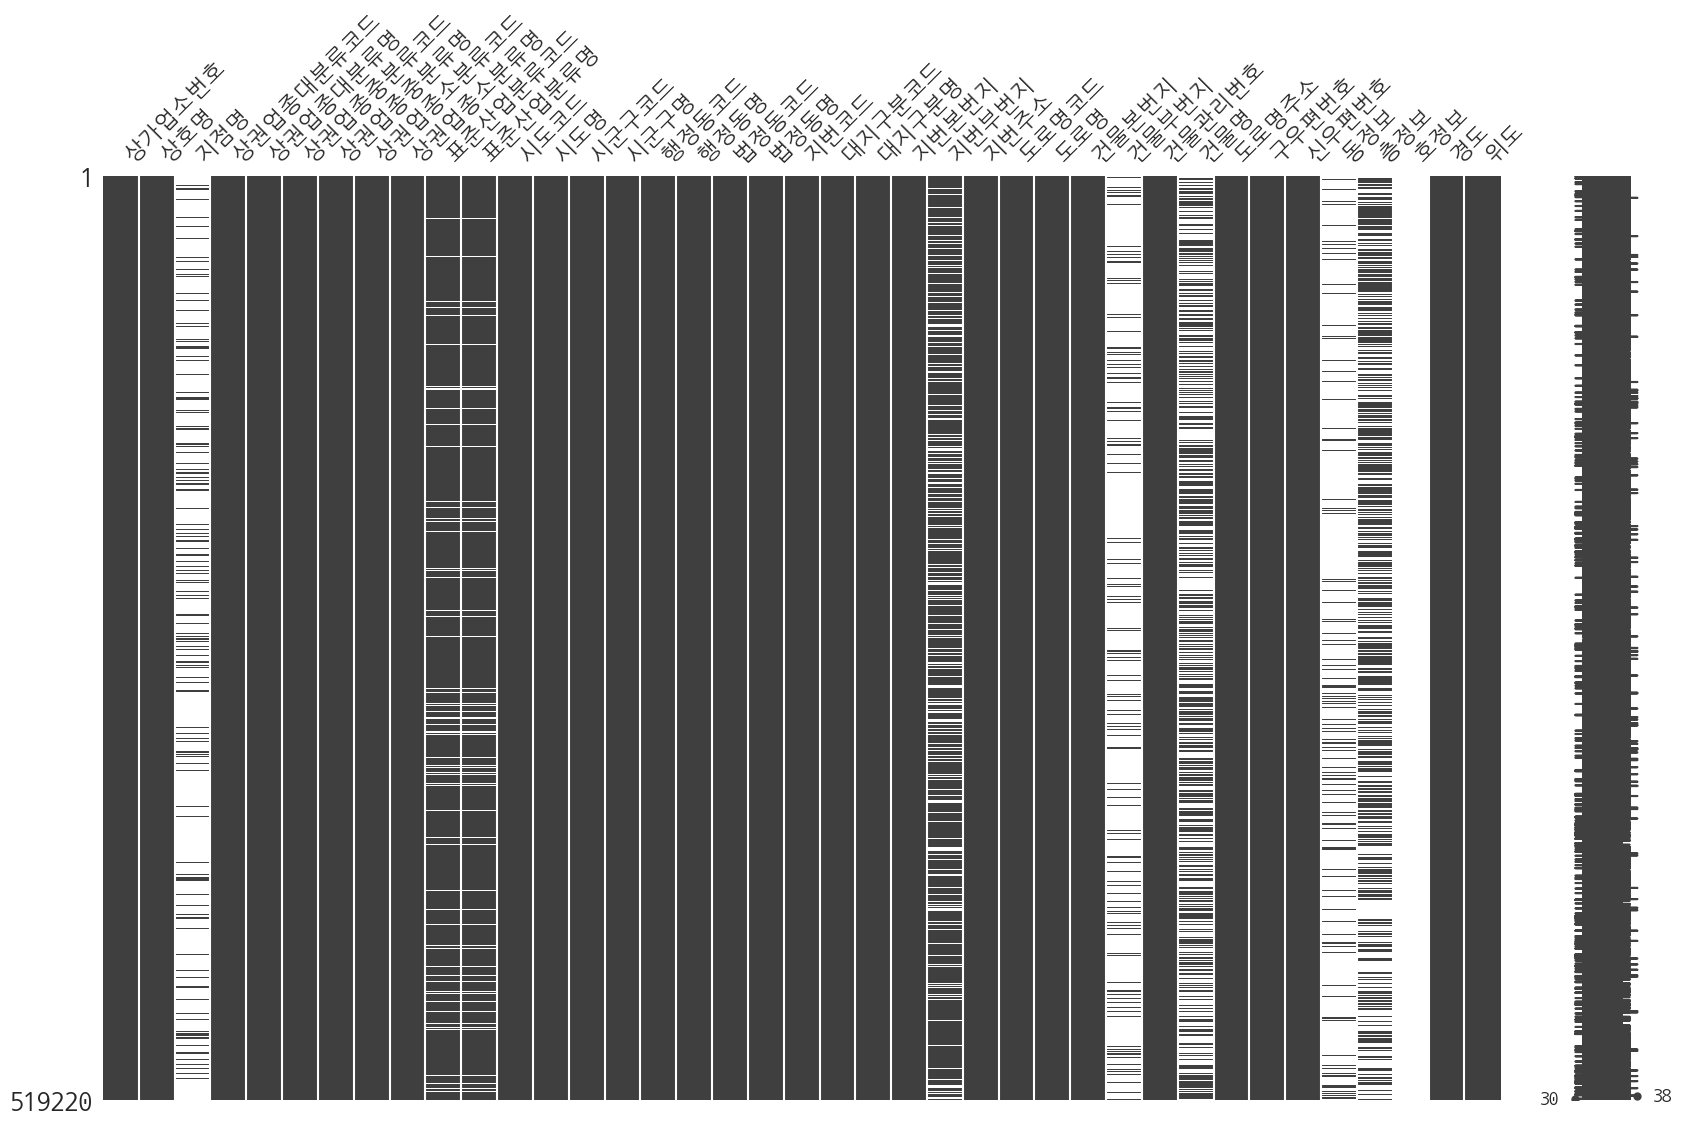

In [11]:
# 컬럼별 시각화
msno.matrix(shop_2022, figsize=(20, 12))

In [12]:
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
                '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_202209 = shop_2022[view_columns]
del shop_2022
shop_202209

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0            제중건강원   NaN       소매    건강/미용식품        건강원  서울특별시  영등포구   
1            민속악기사   NaN       소매  취미/오락관련소매       악기판매  서울특별시   성동구   
2            태평양진주   NaN       소매   시계/귀금속소매     시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소   NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구   
4              비지트   NaN       음식         한식  한식/백반/한정식  서울특별시   서초구   
...            ...   ...      ...        ...        ...    ...   ...   
519215       꾸미다뷰티   NaN    생활서비스    이/미용/건강     발/네일케어  부산광역시   동래구   
519216          본가  꽃게아구       음식         한식  한식/백반/한정식  부산광역시  부산진구   
519217        블루워시   하단점    생활서비스   세탁/가사서비스    세탁소/빨래방  부산광역시   사하구   
519218         몰운대   NaN       소매      종합소매점     수입품판매점  부산광역시   사하구   
519219          루스   NaN       소매      화장품소매     화장품판매점  부산광역시  해운대구   

               행정동명    법정동명                    지번주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   
1               용답동     용답동    서울특별시 성동구 용답동 142-11   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18   
...             ...     ...                     ...   
519215          수민동     수안동     부산광역시 동래구 수안동 40-13   
519216         가야1동     가야동     부산광역시 부산진구 가야동 56-2   
519217         하단2동     하단동     부산광역시 사하구 하단동 887-7   
519218         다대1동     다대동      부산광역시 사하구 다대동 1624   
519219         반송2동     반송동      부산광역시 해운대구 반송동 877   

                                    도로명주소        경도       위도  
0       서울특별시 영등포구 영중로14길 11-17, (영등포동5가) 126.90717 37.52061  
1                 서울특별시 성동구 용답5길 2, (용답동) 127.04902 37.56686  
2             서울특별시 종로구 서순라길 17-10, (봉익동) 126.99353 37.57185  
3            서울특별시 송파구 위례성대로12길 31, (방이동) 127.12152 37.51097  
4              서울특별시 서초구 동광로18길 82, (방배동) 126.99139 37.48837  
...                                   ...       ...      ...  
519215         부산광역시 동래구 수안로8번길 35, (수안동) 129.08954 35.19523  
519216  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰) 129.03698 35.15525  
519217   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치) 128.95905 35.10801  
519218        부산광역시 사하구 다대낙조2길 100, (다대동) 128.96543 35.05638  
519219         부산광역시 해운대구 신반송로 178, (반송동) 129.16052 35.22919  

[519220 rows x 13 columns]

<AxesSubplot:>

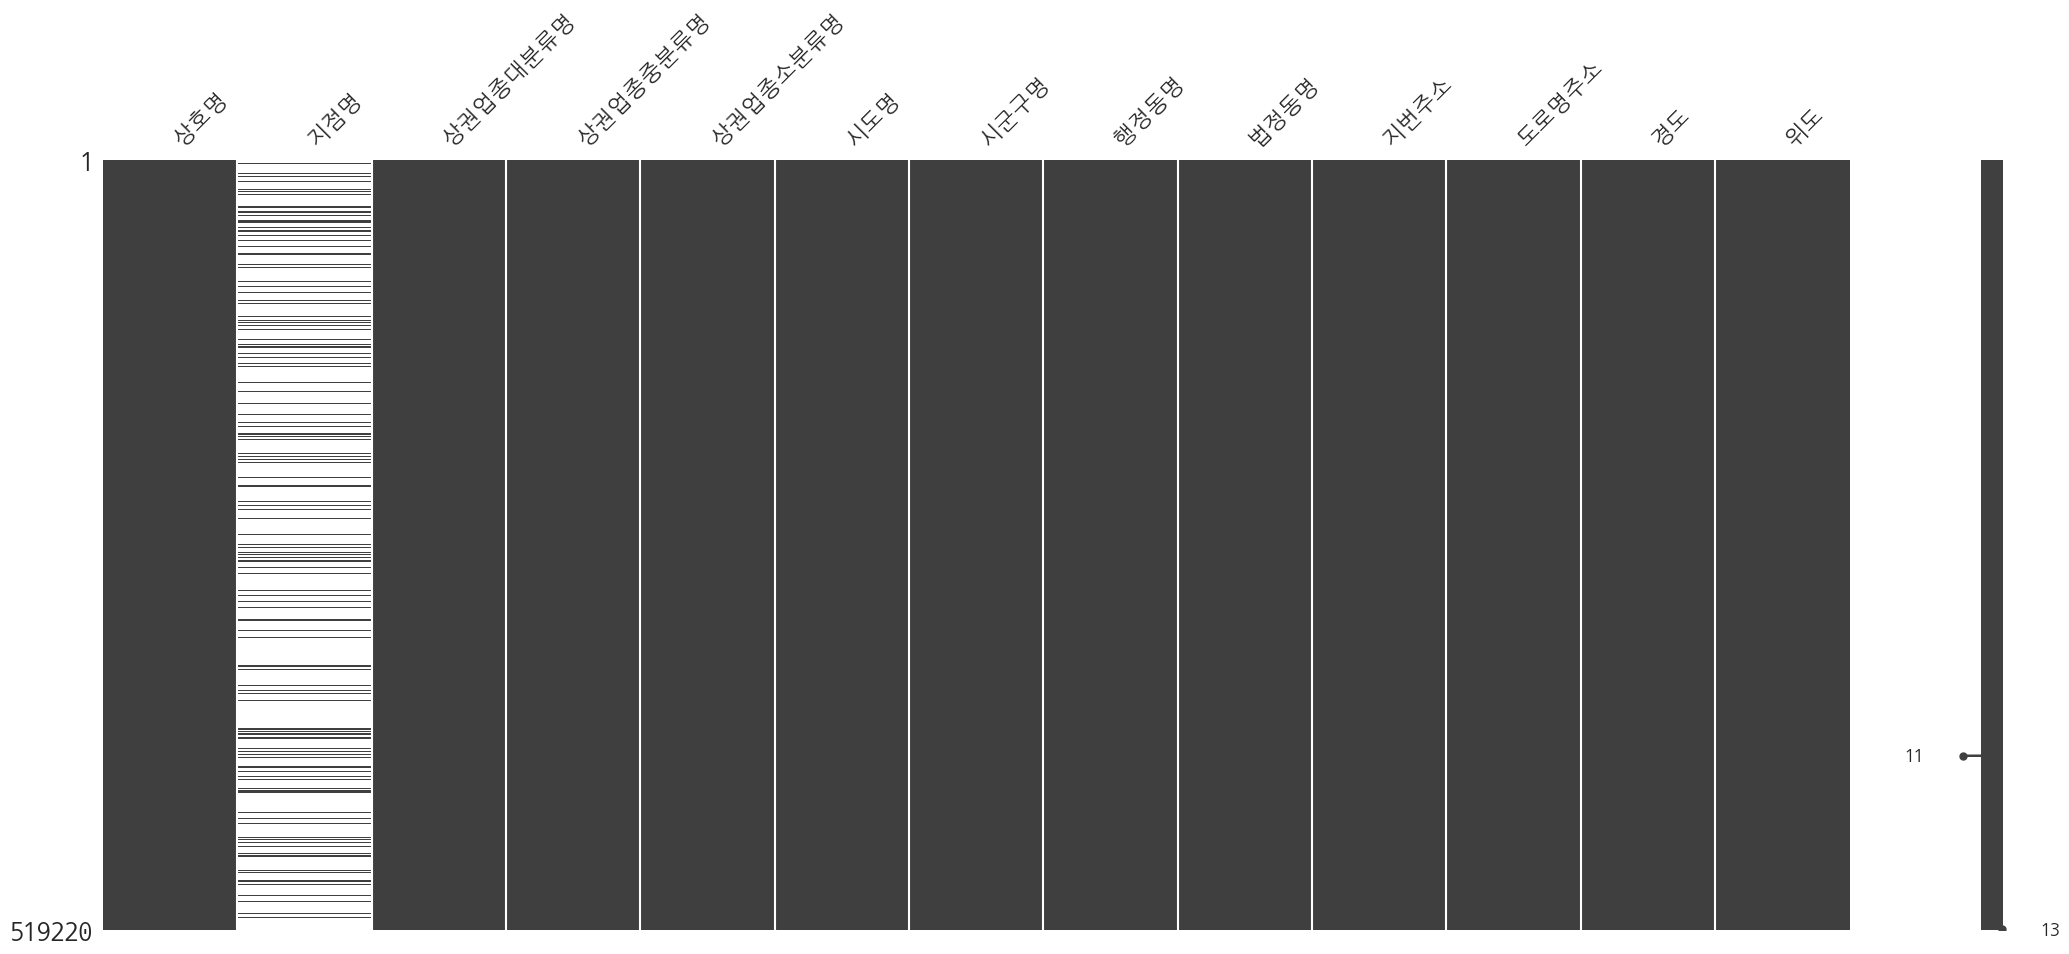

In [13]:
msno.matrix(shop_202209)

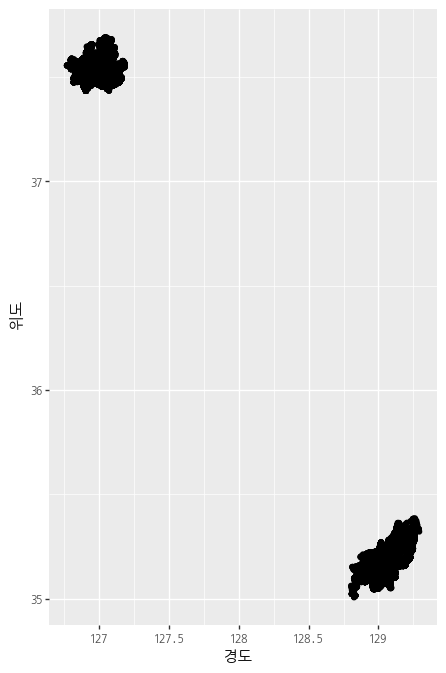

<ggplot: (722579679)>

In [14]:
(ggplot(shop_202209, aes(x='경도', y='위도'))
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(5, 8))
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

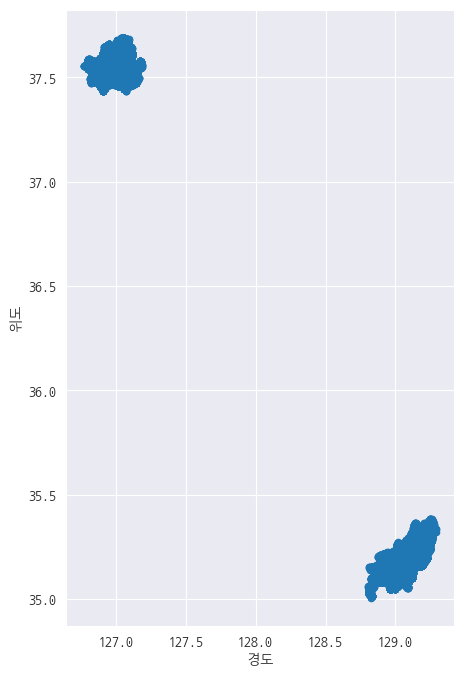

In [15]:
shop_202209.plot.scatter(x='경도', y='위도', grid=True, figsize=(5, 8))

In [16]:
shop_202209

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0            제중건강원   NaN       소매    건강/미용식품        건강원  서울특별시  영등포구   
1            민속악기사   NaN       소매  취미/오락관련소매       악기판매  서울특별시   성동구   
2            태평양진주   NaN       소매   시계/귀금속소매     시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소   NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구   
4              비지트   NaN       음식         한식  한식/백반/한정식  서울특별시   서초구   
...            ...   ...      ...        ...        ...    ...   ...   
519215       꾸미다뷰티   NaN    생활서비스    이/미용/건강     발/네일케어  부산광역시   동래구   
519216          본가  꽃게아구       음식         한식  한식/백반/한정식  부산광역시  부산진구   
519217        블루워시   하단점    생활서비스   세탁/가사서비스    세탁소/빨래방  부산광역시   사하구   
519218         몰운대   NaN       소매      종합소매점     수입품판매점  부산광역시   사하구   
519219          루스   NaN       소매      화장품소매     화장품판매점  부산광역시  해운대구   

               행정동명    법정동명                    지번주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   
1               용답동     용답동    서울특별시 성동구 용답동 142-11   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18   
...             ...     ...                     ...   
519215          수민동     수안동     부산광역시 동래구 수안동 40-13   
519216         가야1동     가야동     부산광역시 부산진구 가야동 56-2   
519217         하단2동     하단동     부산광역시 사하구 하단동 887-7   
519218         다대1동     다대동      부산광역시 사하구 다대동 1624   
519219         반송2동     반송동      부산광역시 해운대구 반송동 877   

                                    도로명주소        경도       위도  
0       서울특별시 영등포구 영중로14길 11-17, (영등포동5가) 126.90717 37.52061  
1                 서울특별시 성동구 용답5길 2, (용답동) 127.04902 37.56686  
2             서울특별시 종로구 서순라길 17-10, (봉익동) 126.99353 37.57185  
3            서울특별시 송파구 위례성대로12길 31, (방이동) 127.12152 37.51097  
4              서울특별시 서초구 동광로18길 82, (방배동) 126.99139 37.48837  
...                                   ...       ...      ...  
519215         부산광역시 동래구 수안로8번길 35, (수안동) 129.08954 35.19523  
519216  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰) 129.03698 35.15525  
519217   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치) 128.95905 35.10801  
519218        부산광역시 사하구 다대낙조2길 100, (다대동) 128.96543 35.05638  
519219         부산광역시 해운대구 신반송로 178, (반송동) 129.16052 35.22919  

[519220 rows x 13 columns]

In [17]:
# shop_202209[shop_202209['시도명'] == '서울특별시']
# shop_202209.loc[shop_202209['시도명'] == '서울특별시']
# pandas에서 불린 인덱싱시 and 조건은 '&'를 사용하고 or 조건은 '|'를 사용한다.
# and, or 조건 지정시 관계 연산자가 사용된 부분(브로드캐스팅 실행된 부분)은 괄호를 반드시 사용해야 한다.
# shop_202209[(shop_202209['시도명'] == '서울특별시') | (shop_202209['시도명'] == '서울')]

# 시도명 열 또는 지번주소 열 또는 도로명주소 열의 입력값을 앞 2글자가 서울인 데이터를 얻어온다.
# shop_202209[shop_202209.시도명.str[:2] == '서울']
# shop_202209[shop_202209.지번주소.str[:2] == '서울']
# shop_202209[shop_202209.도로명주소.str[:2] == '서울']
# shop_202209[shop_202209.도로명주소.str.find('서울') >= 0]
# shop_202209[shop_202209.도로명주소.str.count('서울') >= 1]

# 시도명 열 또는 지번주소 열 또는 도로명주소 열의 입력값이 서울로 시작하는 데이터를 얻어온다.
# startswith() 메서드는 인수로 지정된 문자열로 시작하면 True, 아니면 False를 리턴한다.
shop_seoul = shop_202209[shop_202209.시도명.str.startswith('서울')]  # cf. endswith()
shop_seoul

상호명     지점명 상권업종대분류명    상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0            제중건강원     NaN       소매     건강/미용식품        건강원  서울특별시  영등포구   
1            민속악기사     NaN       소매   취미/오락관련소매       악기판매  서울특별시   성동구   
2            태평양진주     NaN       소매    시계/귀금속소매     시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소     NaN    학문/교육   학원-보습교습입시      학원-입시  서울특별시   송파구   
4              비지트     NaN       음식          한식  한식/백반/한정식  서울특별시   서초구   
...            ...     ...      ...         ...        ...    ...   ...   
361485       밀스튜디오     NaN       소매        의복의류    여성의류전문점  서울특별시   강서구   
361486       챔프컴퍼니     NaN       음식          한식  한식/백반/한정식  서울특별시   서초구   
361487         제라클     NaN       소매  가방/신발/액세서리     액세서리판매  서울특별시   서초구   
361488  아이에스에이주차타워     NaN    생활서비스     자동차/이륜차      주차장운영  서울특별시   강남구   
361489        링키영어  서울동부지사       소매     책/서적/도서         서점  서울특별시   강동구   

               행정동명    법정동명                    지번주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   
1               용답동     용답동    서울특별시 성동구 용답동 142-11   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18   
...             ...     ...                     ...   
361485         등촌1동     등촌동    서울특별시 강서구 등촌동 639-11   
361486         방배1동     방배동    서울특별시 서초구 방배동 938-24   
361487         양재1동     양재동     서울특별시 서초구 양재동 82-18   
361488         압구정동     신사동       서울특별시 강남구 신사동 600   
361489         명일1동     명일동       서울특별시 강동구 명일동 270   

                                    도로명주소        경도       위도  
0       서울특별시 영등포구 영중로14길 11-17, (영등포동5가) 126.90717 37.52061  
1                 서울특별시 성동구 용답5길 2, (용답동) 127.04902 37.56686  
2             서울특별시 종로구 서순라길 17-10, (봉익동) 126.99353 37.57185  
3            서울특별시 송파구 위례성대로12길 31, (방이동) 127.12152 37.51097  
4              서울특별시 서초구 동광로18길 82, (방배동) 126.99139 37.48837  
...                                   ...       ...      ...  
361485           서울특별시 강서구 화곡로 398, (등촌동) 126.85480 37.55846  
361486       서울특별시 서초구 방배로23길 32-4, (방배동) 126.99259 37.48604  
361487         서울특별시 서초구 논현로27길 74, (양재동) 127.04053 37.47864  
361488        서울특별시 강남구 압구정로30길 51, (신사동) 127.02935 37.52392  
361489     서울특별시 강동구 상암로 225, (명일동, 삼익맨션) 127.14750 37.54730  

[361490 rows x 13 columns]

In [18]:
# '~'는 ~가 아닌 것을 의미한다. → 논리 부정, not 연산자
shop_expect_seoul = shop_202209[~shop_202209.시도명.str.startswith('서울')]
shop_expect_seoul

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명   법정동명  \
361490    미광장   NaN       숙박  모텔/여관/여인숙  모텔/여관/여인숙  부산광역시    중구   부평동  부평동4가   
361491  BHC치킨   동래점       음식     닭/오리요리  후라이드/양념치킨  부산광역시   동래구   복산동    복천동   
361492    스텔라   NaN       소매       의복의류       일반의류  부산광역시   수영구  남천2동    남천동   
361493   도란도란   NaN       음식         한식  한식/백반/한정식  부산광역시  부산진구  개금1동    개금동   
361494  럭키사진관   NaN    생활서비스         사진        사진관  부산광역시   사하구   당리동    당리동   
...       ...   ...      ...        ...        ...    ...   ...   ...    ...   
519215  꾸미다뷰티   NaN    생활서비스    이/미용/건강     발/네일케어  부산광역시   동래구   수민동    수안동   
519216     본가  꽃게아구       음식         한식  한식/백반/한정식  부산광역시  부산진구  가야1동    가야동   
519217   블루워시   하단점    생활서비스   세탁/가사서비스    세탁소/빨래방  부산광역시   사하구  하단2동    하단동   
519218    몰운대   NaN       소매      종합소매점     수입품판매점  부산광역시   사하구  다대1동    다대동   
519219     루스   NaN       소매      화장품소매     화장품판매점  부산광역시  해운대구  반송2동    반송동   

                        지번주소                              도로명주소        경도  \
361490   부산광역시 중구 부평동4가 25-1       부산광역시 중구 보수대로44번길 5, (부평동4가) 129.02367   
361491     부산광역시 동래구 복천동 185       부산광역시 동래구 동래로147번길 18, (복천동) 129.08716   
361492   부산광역시 수영구 남천동 148-4   부산광역시 수영구 광안해변로 100, (남천동, 삼익비치) 129.11540   
361493  부산광역시 부산진구 개금동 174-4   부산광역시 부산진구 가야대로482번길 29-3, (개금동) 129.02494   
361494  부산광역시 사하구 당리동 325-30          부산광역시 사하구 낙동대로 395, (당리동) 128.97479   
...                      ...                                ...       ...   
519215   부산광역시 동래구 수안동 40-13         부산광역시 동래구 수안로8번길 35, (수안동) 129.08954   
519216   부산광역시 부산진구 가야동 56-2  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰) 129.03698   
519217   부산광역시 사하구 하단동 887-7   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치) 128.95905   
519218    부산광역시 사하구 다대동 1624        부산광역시 사하구 다대낙조2길 100, (다대동) 128.96543   
519219    부산광역시 해운대구 반송동 877         부산광역시 해운대구 신반송로 178, (반송동) 129.16052   

             위도  
361490 35.10098  
361491 35.20527  
361492 35.14377  
361493 35.15164  
361494 35.10291  
...         ...  
519215 35.19523  
519216 35.15525  
519217 35.10801  
519218 35.05638  
519219 35.22919  

[157730 rows x 13 columns]

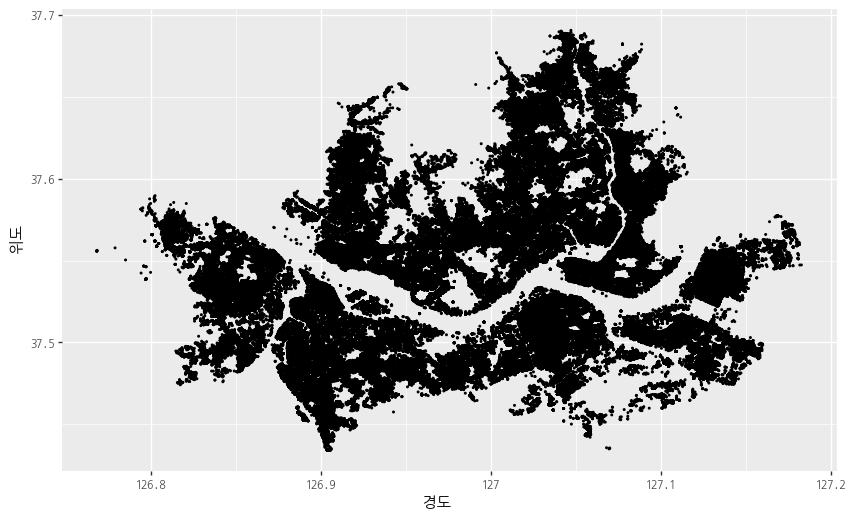

<ggplot: (346236145)>

In [19]:
# 서울만 시각화해보면 서울 지도와 비슷한 양상을 띈다.
(ggplot(shop_seoul, aes(x='경도', y='위도'))
 + geom_point(size=0.2)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

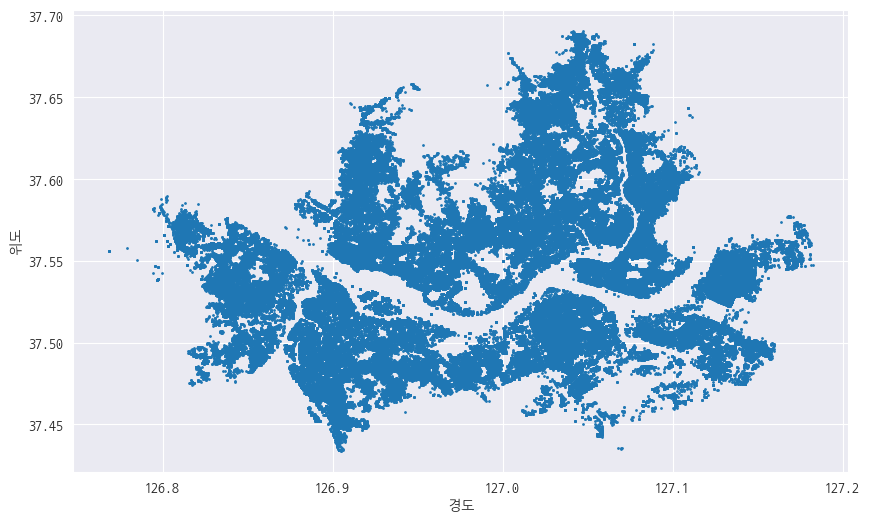

In [20]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True, figsize=(10, 6), s=1)

shop_202209 데이터프레임의 도로명주소를 활용해서 '시도', '구군' 열을 만든다.

In [21]:
# split() 메서드에 expand=True 속성을 지정하여 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도' 열과 '구군' 열을 만든다.
print(type(shop_202209[:1].도로명주소))  # <class 'pandas.core.series.Series'>
print(type(shop_202209[:1].도로명주소.str))  # <class 'pandas.core.strings.accessor.StringMethods'>
print(type(shop_202209[:1].도로명주소.str.split()))  # <class 'pandas.core.series.Series'>
# expand=True 속성을 지정하면 구분자를 경계로 문자열을 구분해서 데이터프레임으로 리턴한다. → 여러 개의 열로 나눈다.
print(type(shop_202209[:1].도로명주소.str.split(' ', expand=True)))  # <class 'pandas.core.frame.DataFrame'>
print(shop_202209['도로명주소'].str.split(' ', expand=True)[0])  # 데이터프레임의 '0'이라는 컬럼을 얻어온다.
print(shop_202209['도로명주소'].str.split(' ', expand=True)[1])  # 데이터프레임의 '1'이라는 컬럼을 얻어온다.

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
0         서울특별시
1         서울특별시
2         서울특별시
3         서울특별시
4         서울특별시
          ...  
519215    부산광역시
519216    부산광역시
519217    부산광역시
519218    부산광역시
519219    부산광역시
Name: 0, Length: 519220, dtype: object
0         영등포구
1          성동구
2          종로구
3          송파구
4          서초구
          ... 
519215     동래구
519216    부산진구
519217     사하구
519218     사하구
519219    해운대구
Name: 1, Length: 519220, dtype: object


In [22]:
shop_202209['시도'] = shop_202209['도로명주소'].str.split(' ', expand=True)[0]
shop_202209['구군'] = shop_202209.도로명주소.str.split(' ', expand=True)[1]
shop_202209

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0            제중건강원   NaN       소매    건강/미용식품        건강원  서울특별시  영등포구   
1            민속악기사   NaN       소매  취미/오락관련소매       악기판매  서울특별시   성동구   
2            태평양진주   NaN       소매   시계/귀금속소매     시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소   NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구   
4              비지트   NaN       음식         한식  한식/백반/한정식  서울특별시   서초구   
...            ...   ...      ...        ...        ...    ...   ...   
519215       꾸미다뷰티   NaN    생활서비스    이/미용/건강     발/네일케어  부산광역시   동래구   
519216          본가  꽃게아구       음식         한식  한식/백반/한정식  부산광역시  부산진구   
519217        블루워시   하단점    생활서비스   세탁/가사서비스    세탁소/빨래방  부산광역시   사하구   
519218         몰운대   NaN       소매      종합소매점     수입품판매점  부산광역시   사하구   
519219          루스   NaN       소매      화장품소매     화장품판매점  부산광역시  해운대구   

               행정동명    법정동명                    지번주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   
1               용답동     용답동    서울특별시 성동구 용답동 142-11   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18   
...             ...     ...                     ...   
519215          수민동     수안동     부산광역시 동래구 수안동 40-13   
519216         가야1동     가야동     부산광역시 부산진구 가야동 56-2   
519217         하단2동     하단동     부산광역시 사하구 하단동 887-7   
519218         다대1동     다대동      부산광역시 사하구 다대동 1624   
519219         반송2동     반송동      부산광역시 해운대구 반송동 877   

                                    도로명주소        경도       위도     시도    구군  
0       서울특별시 영등포구 영중로14길 11-17, (영등포동5가) 126.90717 37.52061  서울특별시  영등포구  
1                 서울특별시 성동구 용답5길 2, (용답동) 127.04902 37.56686  서울특별시   성동구  
2             서울특별시 종로구 서순라길 17-10, (봉익동) 126.99353 37.57185  서울특별시   종로구  
3            서울특별시 송파구 위례성대로12길 31, (방이동) 127.12152 37.51097  서울특별시   송파구  
4              서울특별시 서초구 동광로18길 82, (방배동) 126.99139 37.48837  서울특별시   서초구  
...                                   ...       ...      ...    ...   ...  
519215         부산광역시 동래구 수안로8번길 35, (수안동) 129.08954 35.19523  부산광역시   동래구  
519216  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰) 129.03698 35.15525  부산광역시  부산진구  
519217   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치) 128.95905 35.10801  부산광역시   사하구  
519218        부산광역시 사하구 다대낙조2길 100, (다대동) 128.96543 35.05638  부산광역시   사하구  
519219         부산광역시 해운대구 신반송로 178, (반송동) 129.16052 35.22919  부산광역시  해운대구  

[519220 rows x 15 columns]

In [23]:
# '시도', '구군' 열이 추가된 원본 데이터프레임에서 서울만 다시 추출하여 서울 데이터프레임을 만든다.
shop_seoul = shop_202209[shop_202209.시도명.str.startswith('서울')]

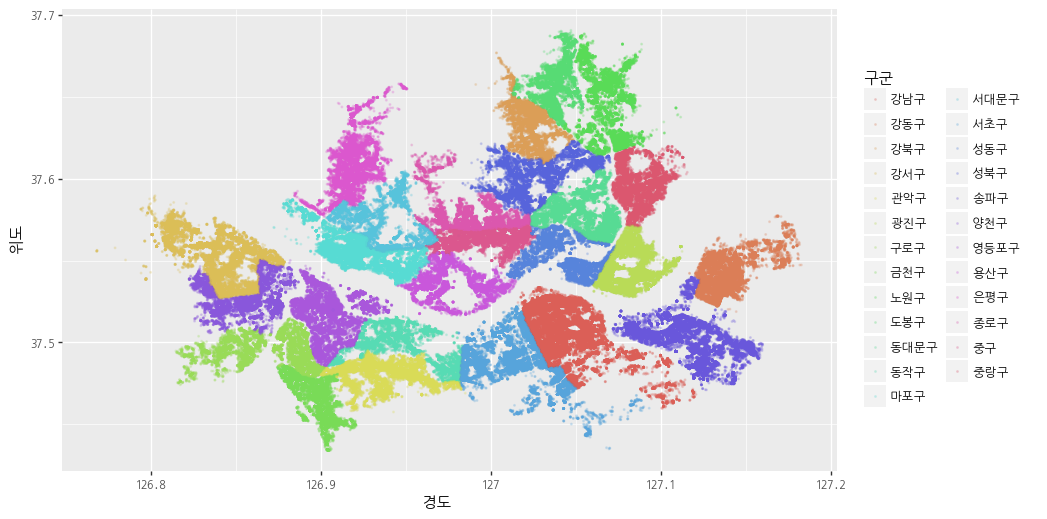

<ggplot: (698340256)>

In [24]:
(ggplot(shop_seoul, aes(x='경도', y='위도', color='구군'))
 + geom_point(size=0.2, alpha=0.2)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

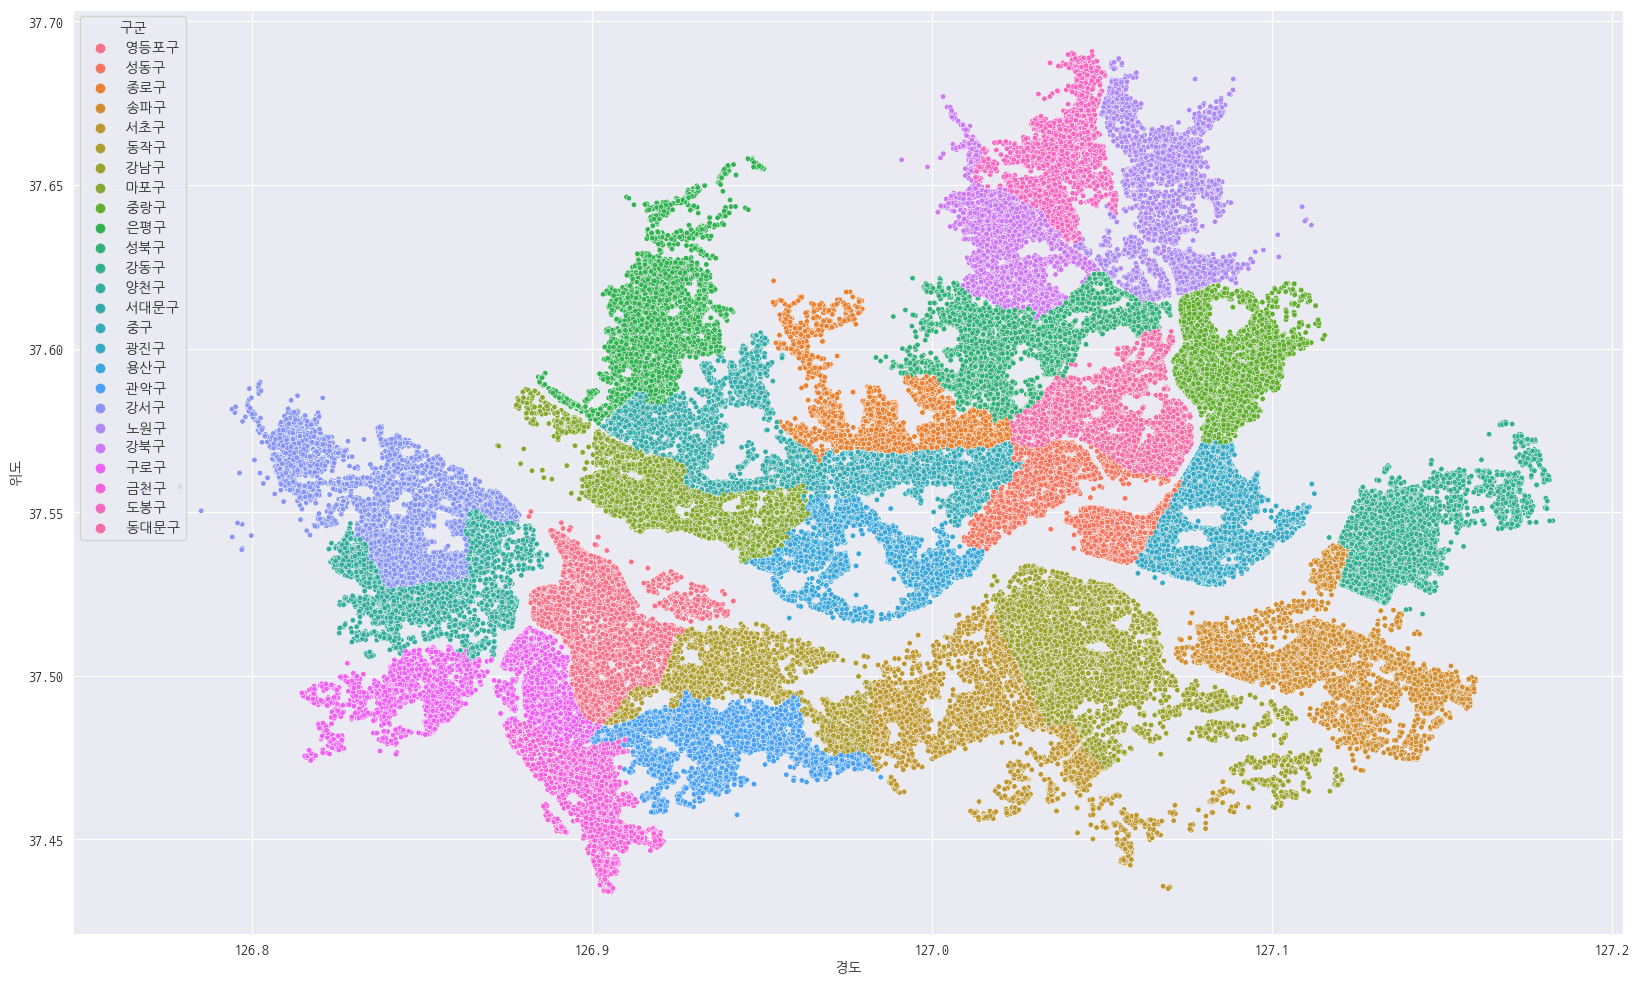

In [25]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', s=15, hue='구군')

In [26]:
set(shop_seoul.상권업종대분류명)

{'관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'}

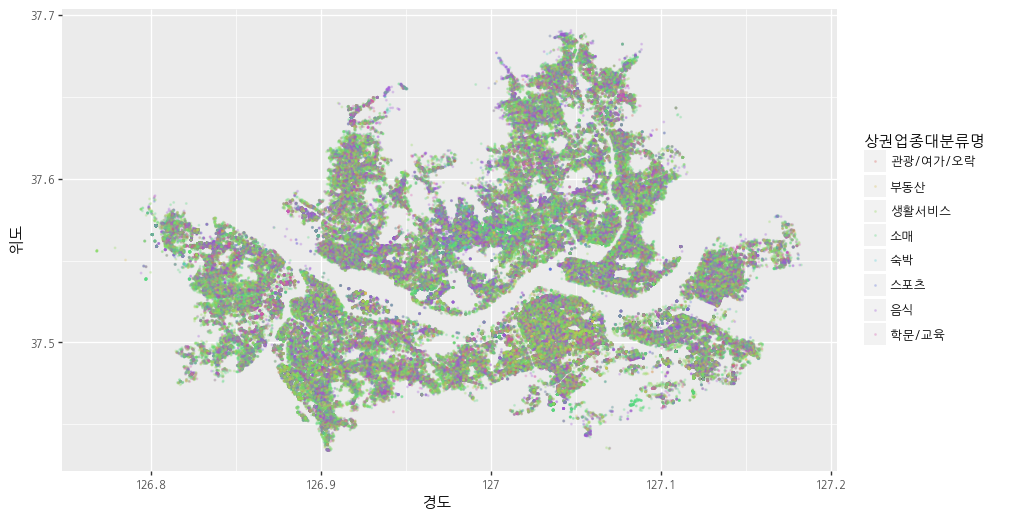

<ggplot: (346238877)>

In [27]:
(ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명'))
 + geom_point(size=0.2, alpha=0.2)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + scale_fill_gradient(low='purple', high='red')
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

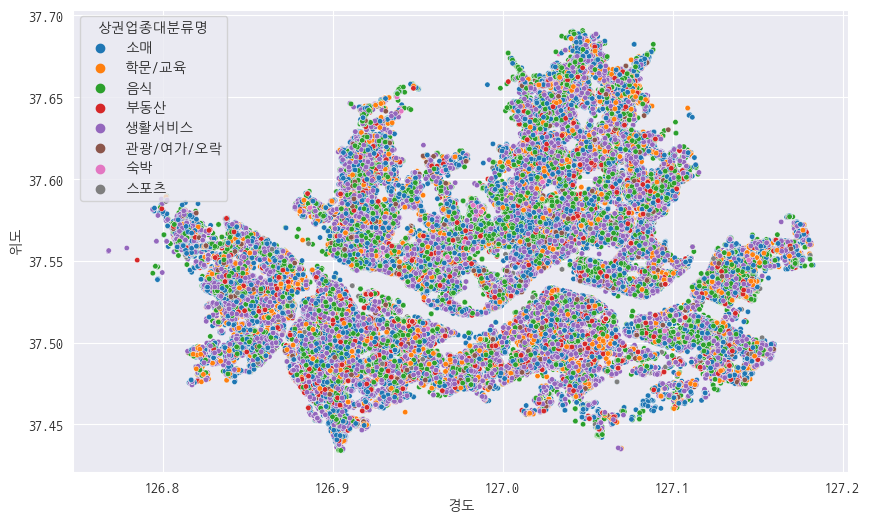

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', s=15, hue='상권업종대분류명')

학문/교육과 관련된 정보 보기

In [29]:
shop_seoul_edu = shop_seoul[shop_seoul.상권업종대분류명 == '학문/교육']
shop_seoul_edu

상호명  지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
3         김선희꼼꼼국어교습소  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구  방이1동   
8              무비디자인  NaN    학문/교육  학원-창업취업취미     학원-디자인  서울특별시   마포구   대흥동   
18              힐리빙텔  NaN    학문/교육    도서관/독서실        독서실  서울특별시  서대문구   신촌동   
19           김샘수학교습소  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시    중구  신당5동   
43            노바수학학원  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   강남구  일원2동   
...              ...  ...      ...        ...        ...    ...   ...   ...   
361396         발돋움국어  NaN    학문/교육      학원-어학  학원-외국어/어학  서울특별시  동대문구  휘경1동   
361408  길동리드인독서논술교습소  NaN    학문/교육       학원기타     학원(종합)  서울특별시   강동구    길동   
361414          공방순수  NaN    학문/교육       학원기타      학원-기타  서울특별시   관악구   은천동   
361467         수학교습소  NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   강남구  대치4동   
361474        현매니지먼트  NaN    학문/교육      학원-어학  학원-외국어/어학  서울특별시   강남구  논현2동   

        법정동명                    지번주소                                  도로명주소  \
3        방이동     서울특별시 송파구 방이동 197-3           서울특별시 송파구 위례성대로12길 31, (방이동)   
8       노고산동   서울특별시 마포구 노고산동 107-17                서울특별시 마포구 백범로 8, (노고산동)   
18       대현동    서울특별시 서대문구 대현동 37-69            서울특별시 서대문구 이화여대5길 28, (대현동)   
19       신당동        서울특별시 중구 신당동 851  서울특별시 중구 퇴계로90길 74, (신당동, 래미안하이베르아파트)   
43       개포동      서울특별시 강남구 개포동 12-4               서울특별시 강남구 개포로 615, (개포동)   
...      ...                     ...                                    ...   
361396   휘경동  서울특별시 동대문구 휘경동 183-128            서울특별시 동대문구 회기로29길 12, (휘경동)   
361408    길동      서울특별시 강동구 길동 125-8                서울특별시 강동구 명일로 212, (길동)   
361414   봉천동      서울특별시 관악구 봉천동 1718      서울특별시 관악구 은천로 93, (봉천동, 벽산블루밍아파트)   
361467   대치동     서울특별시 강남구 대치동 931-1              서울특별시 강남구 삼성로67길 3, (대치동)   
361474   논현동    서울특별시 강남구 논현동 113-20            서울특별시 강남구 언주로134길 35, (논현동)   

              경도       위도     시도    구군  
3      127.12152 37.51097  서울특별시   송파구  
8      126.93672 37.55400  서울특별시   마포구  
18     126.94406 37.55841  서울특별시  서대문구  
19     127.02097 37.56100  서울특별시    중구  
43     127.07557 37.49265  서울특별시   강남구  
...          ...      ...    ...   ...  
361396 127.05814 37.59065  서울특별시  동대문구  
361408 127.14616 37.53751  서울특별시   강동구  
361414 126.94588 37.48734  서울특별시   관악구  
361467 127.05909 37.50110  서울특별시   강남구  
361474 127.03839 37.51727  서울특별시   강남구  

[26193 rows x 15 columns]

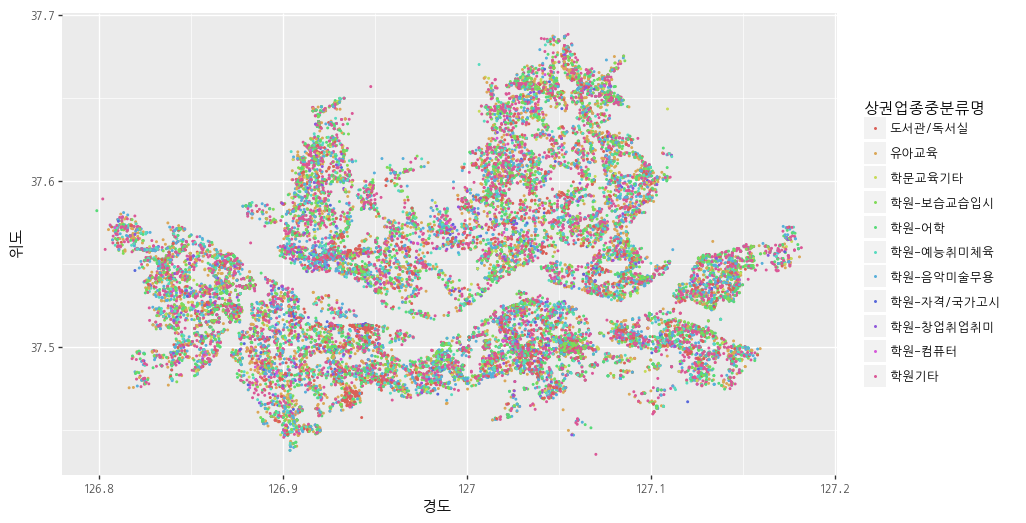

<ggplot: (745910763)>

In [30]:
(ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명'))
 + geom_point(size=0.2, alpha=1.0)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + scale_fill_gradient(low='purple', high='red')
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

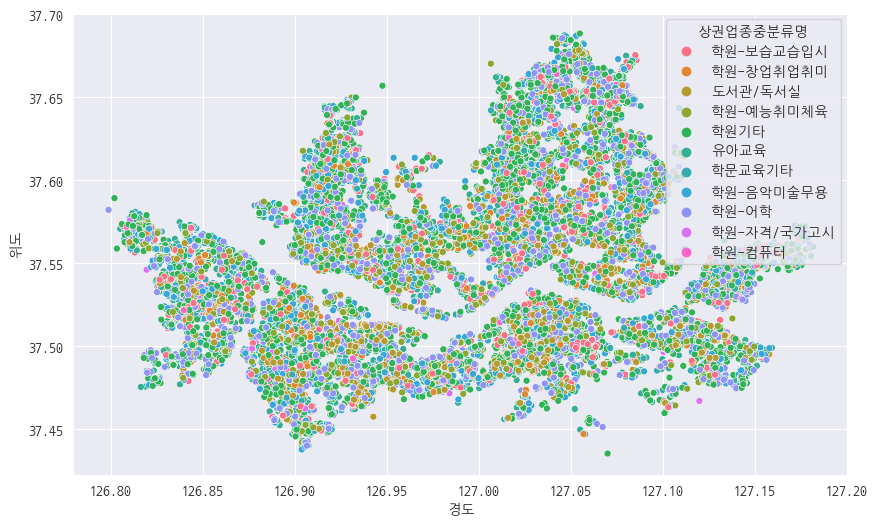

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', s=25, hue='상권업종중분류명')

부동산과 관련된 정보 보기

In [32]:
shop_seoul_estate = shop_seoul[shop_seoul.상권업종대분류명 == '부동산']
shop_seoul_estate

상호명  지점명 상권업종대분류명  상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
10        연세공인중개사사무소  NaN      부동산     부동산중개    부동산중개  서울특별시  은평구   역촌동  역촌동   
33           미래공인중개사  NaN      부동산     부동산중개    부동산중개  서울특별시  송파구   오금동  오금동   
36             대성부동산  NaN      부동산     부동산중개    부동산중개  서울특별시  용산구  이촌2동  이촌동   
47              럭키공인  NaN      부동산     부동산중개    부동산중개  서울특별시  강남구  도곡1동  도곡동   
58         행복공인중개사무소  NaN      부동산     부동산중개    부동산중개  서울특별시  강동구  성내1동  성내동   
...              ...  ...      ...       ...      ...    ...  ...   ...  ...   
361464  케이플러스부동산중개법인  NaN      부동산     부동산중개    부동산중개  서울특별시  종로구   사직동  내수동   
361466        케이엠컨설팅  NaN      부동산  평가/개발/관리    부동산자문  서울특별시  강서구  가양1동  가양동   
361468        삼마프라퍼티  NaN      부동산        분양  건물분양-종합  서울특별시  강남구  역삼2동  역삼동   
361473            모수  NaN      부동산     부동산중개    부동산중개  서울특별시  서초구  서초3동  서초동   
361482       에스비자산개발  NaN      부동산        분양  건물분양-종합  서울특별시  송파구  가락2동  가락동   

                        지번주소                              도로명주소        경도  \
10       서울특별시 은평구 역촌동 17-15           서울특별시 은평구 진흥로 101, (역촌동) 126.92233   
33          서울특별시 송파구 오금동 43  서울특별시 송파구 오금로35길 17, (오금동, 현대아파트) 127.12734   
36      서울특별시 용산구 이촌동 203-61         서울특별시 용산구 이촌로22길 20, (이촌동) 126.95558   
47       서울특별시 강남구 도곡동 959-3      서울특별시 강남구 남부순환로359길 34, (도곡동) 127.03567   
58         서울특별시 강동구 성내동 465         서울특별시 강동구 성내로14길 27, (성내동) 127.12661   
...                      ...                                ...       ...   
361464      서울특별시 종로구 내수동 75  서울특별시 종로구 새문안로3길 36, (내수동, 용비어천가) 126.97328   
361466   서울특별시 강서구 가양동 131-3           서울특별시 강서구 양천로 358, (가양동) 126.84201   
361468  서울특별시 강남구 역삼동 733-11         서울특별시 강남구 논현로76길 24, (역삼동) 127.04076   
361473  서울특별시 서초구 서초동 1554-9        서울특별시 서초구 반포대로30길 43, (서초동) 127.01089   
361482  서울특별시 송파구 가락동 181-11         서울특별시 송파구 동남로20길 32, (가락동) 127.13511   

             위도     시도   구군  
10     37.60589  서울특별시  은평구  
33     37.50639  서울특별시  송파구  
36     37.52529  서울특별시  용산구  
47     37.48703  서울특별시  강남구  
58     37.52660  서울특별시  강동구  
...         ...    ...  ...  
361464 37.57341  서울특별시  종로구  
361466 37.56769  서울특별시  강서구  
361468 37.49735  서울특별시  강남구  
361473 37.49228  서울특별시  서초구  
361482 37.49488  서울특별시  송파구  

[18600 rows x 15 columns]

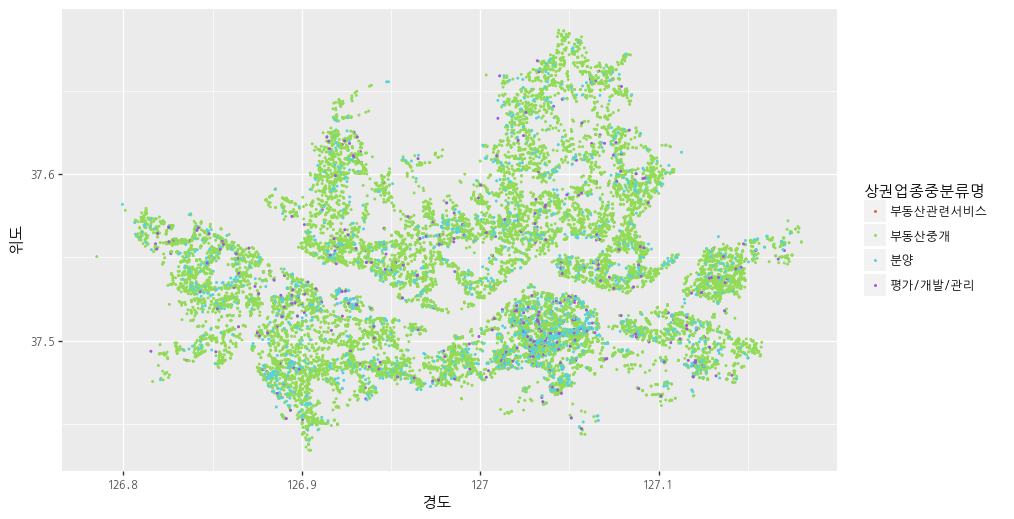

<ggplot: (723919065)>

In [33]:
(ggplot(shop_seoul_estate, aes(x='경도', y='위도', color='상권업종중분류명'))
 + geom_point(size=0.2, alpha=1.0)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + scale_fill_gradient(low='purple', high='red')
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

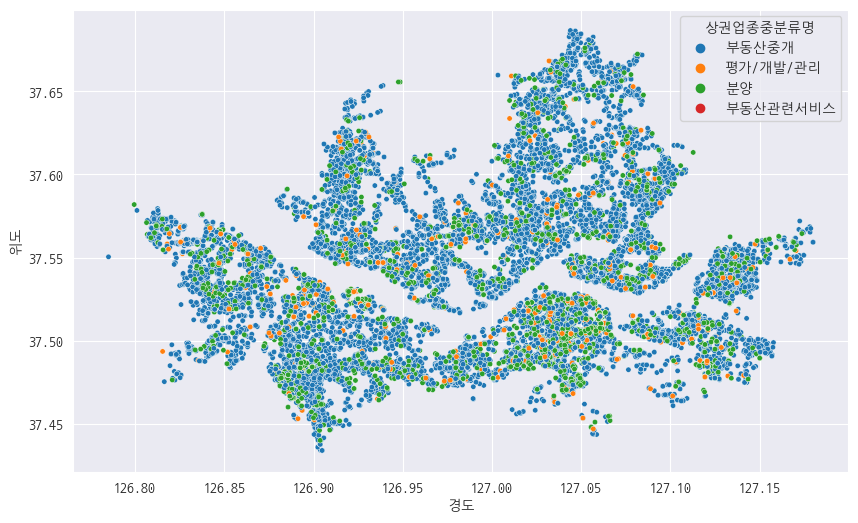

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shop_seoul_estate, x='경도', y='위도', s=15, hue='상권업종중분류명')

In [35]:
set(shop_seoul_edu.상권업종중분류명)

{'도서관/독서실',
 '유아교육',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 '학원기타'}

In [36]:
shop_seoul_edu_computer = shop_seoul[shop_seoul.상권업종중분류명 == '학원-컴퓨터']
shop_seoul_edu_computer

상호명      지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명  \
4888        진원컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  양천구  신월5동   
5664      대성컴퓨터회계학원  대성컴퓨터회계    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  관악구   인헌동   
7079        구로컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  금천구  시흥1동   
13857     아몬정보컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  중랑구  중화1동   
15424       구미컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강남구  역삼1동   
...             ...      ...      ...      ...      ...    ...  ...   ...   
330119  코딩온도화점코딩교습소      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  마포구   도화동   
334417           학원   한국드론기술    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  금천구   가산동   
349707           학원    잼코딩서초    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서초구  서초1동   
354096   메타코딩컴퓨터교습소      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  양천구  신월4동   
355585          네오락      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서초구  반포1동   

       법정동명                   지번주소                          도로명주소        경도  \
4888    신월동     서울특별시 양천구 신월동 28-6        서울특별시 양천구 화곡로 41, (신월동) 126.82648   
5664    봉천동  서울특별시 관악구 봉천동 1657-24    서울특별시 관악구 남부순환로 1952, (봉천동) 126.96566   
7079    시흥동   서울특별시 금천구 시흥동 870-10      서울특별시 금천구 시흥대로 266, (시흥동) 126.89990   
13857   중화동    서울특별시 중랑구 중화동 290-5    서울특별시 중랑구 동일로130길 39, (중화동) 127.08212   
15424   역삼동    서울특별시 강남구 역삼동 816-3      서울특별시 강남구 강남대로 416, (역삼동) 127.02714   
...     ...                    ...                            ...       ...   
330119  도화동   서울특별시 마포구 도화동 347-66       서울특별시 마포구 도화2길 53, (도화동) 126.95041   
334417  가산동    서울특별시 금천구 가산동 60-17     서울특별시 금천구 디지털로9길 65, (가산동) 126.88523   
349707  서초동   서울특별시 서초구 서초동 1603-9    서울특별시 서초구 서초중앙로 40-6, (서초동) 127.01644   
354096  신월동   서울특별시 양천구 신월동 439-16  서울특별시 양천구 오목로 19, (신월동, 서륭타운) 126.83966   
355585  반포동      서울특별시 서초구 반포동 745      서울특별시 서초구 사평대로 335, (반포동) 127.01959   

             위도     시도   구군  
4888   37.53954  서울특별시  양천구  
5664   37.47594  서울특별시  관악구  
7079   37.45751  서울특별시  금천구  
13857  37.59998  서울특별시  중랑구  
15424  37.49979  서울특별시  강남구  
...         ...    ...  ...  
330119 37.53866  서울특별시  마포구  
334417 37.48026  서울특별시  금천구  
349707 37.48565  서울특별시  서초구  
354096 37.52164  서울특별시  양천구  
355585 37.50345  서울특별시  서초구  

[175 rows x 15 columns]

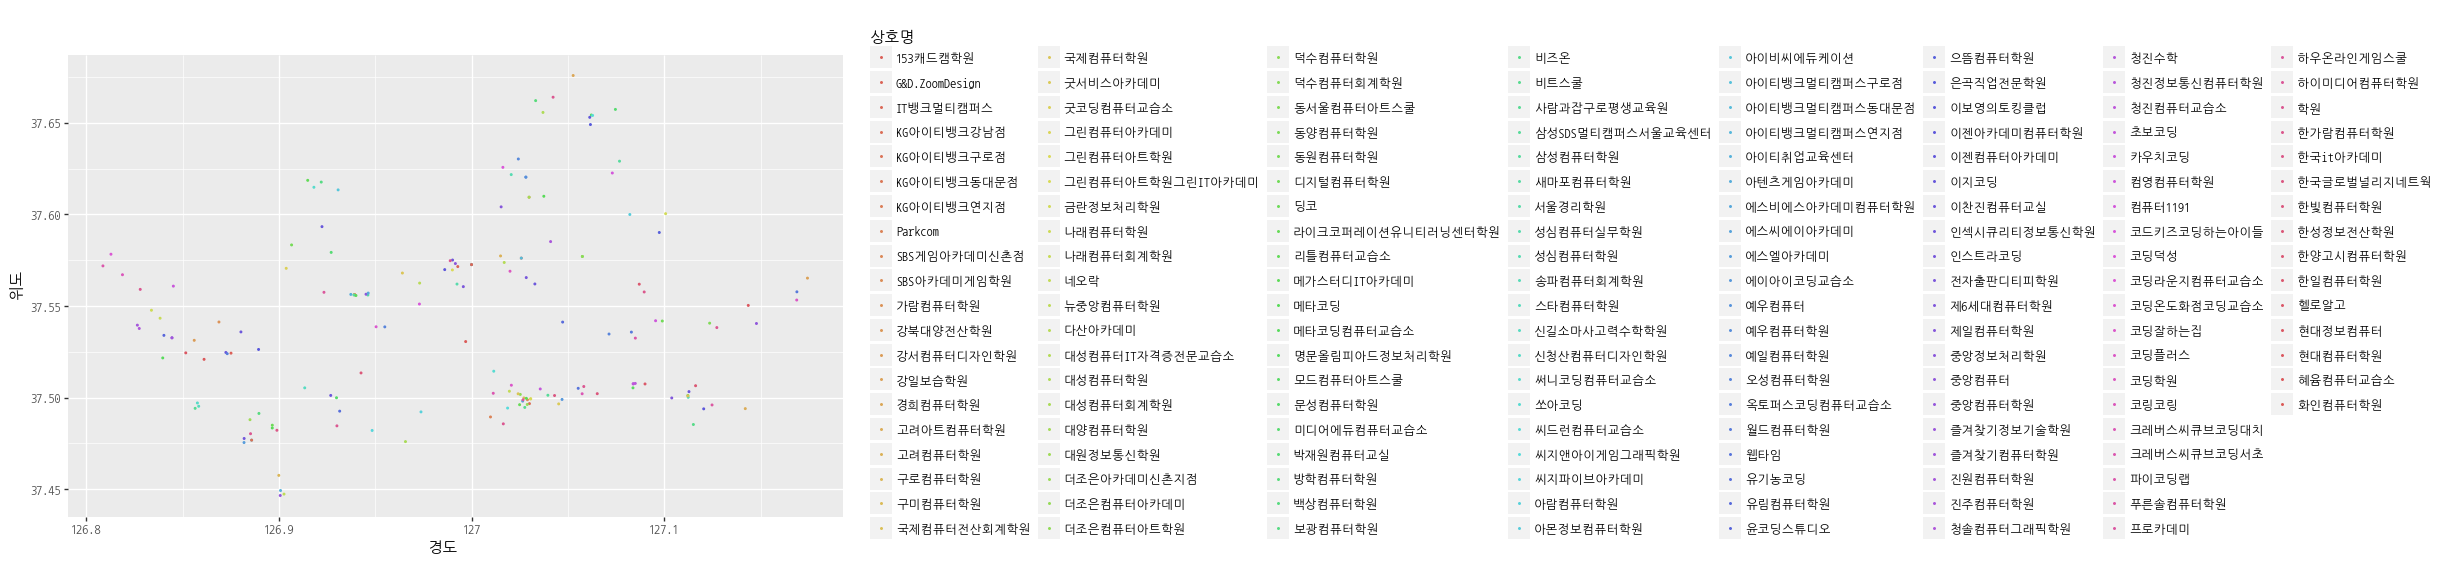

<ggplot: (347755954)>

In [37]:
(ggplot(shop_seoul_edu_computer, aes(x='경도', y='위도', color='상호명'))
 + geom_point(size=0.2, alpha=1.0)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + scale_fill_gradient(low='purple', high='red')
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

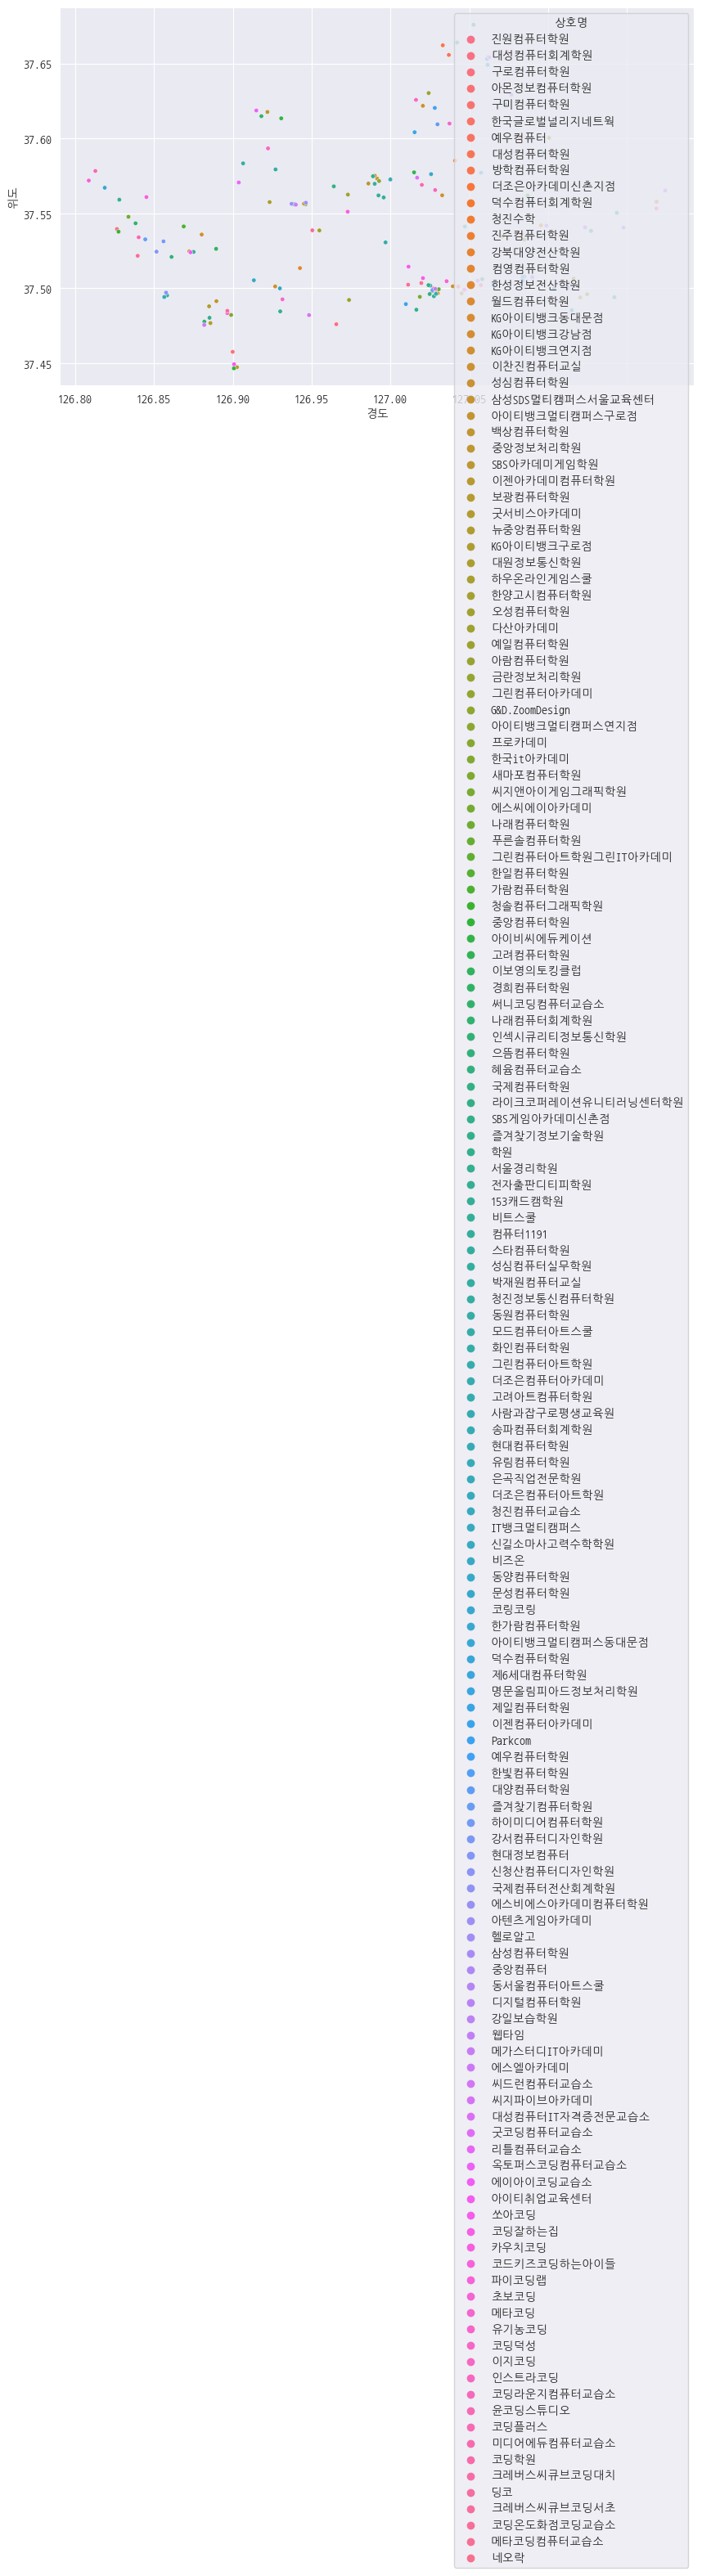

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shop_seoul_edu_computer, x='경도', y='위도', s=15, hue='상호명')

folium 컴퓨터학원 위치 시각화

In [39]:
data = shop_seoul_edu_computer
edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')

for _, edu in data.iterrows():
    popup = folium.Popup('{}: {}'.format(edu['상호명'], edu['도로명주소']), max_width=300)
    folium.Marker(location=[edu['위도'], edu['경도']], popup=popup).add_to(edu_map)

'''
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(edu_map)
'''

edu_map.save('./output/edu_map.html')
edu_map

In [40]:
set(shop_seoul.상권업종중분류명)

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [41]:
shop_seoul_cafe = shop_seoul[shop_seoul.상권업종중분류명 == '커피점/카페']
shop_seoul_cafe

상호명          지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명  시군구명  \
20            커피빈  코리아대학로대명거리점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구   
97          요거프레소          쌍문점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   도봉구   
188         우성커피숍          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   양천구   
195          버블베어          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   강서구   
230           알뤼르          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   강남구   
...           ...          ...      ...      ...          ...    ...   ...   
361388  공유KYOUYUU          2호점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   성동구   
361389       운비차실          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시    중구   
361462         풀꽃          NaN       음식   커피점/카페    전통찻집/인삼찻집  서울특별시   강동구   
361472        댄싱컵         가재울점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서대문구   
361480       플랫카페          NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   광진구   

         행정동명   법정동명                  지번주소  \
20        혜화동   명륜4가     서울특별시 종로구 명륜4가 51   
97       쌍문2동    쌍문동      서울특별시 도봉구 쌍문동 20   
188      신월4동    신월동   서울특별시 양천구 신월동 514-2   
195      방화3동    방화동     서울특별시 강서구 방화동 819   
230      대치4동    대치동     서울특별시 강남구 대치동 894   
...       ...    ...                   ...   
361388    용답동    용답동   서울특별시 성동구 용답동 45-14   
361389    회현동  회현동1가  서울특별시 중구 회현동1가 172-4   
361462   암사3동    암사동  서울특별시 강동구 암사동 441-10   
361472  남가좌2동   남가좌동   서울특별시 서대문구 남가좌동 390   
361480   구의1동    구의동   서울특별시 광진구 구의동 635-2   

                                       도로명주소        경도       위도     시도    구군  
20                  서울특별시 종로구 대명길 25, (명륜4가) 127.00017 37.58315  서울특별시   종로구  
97             서울특별시 도봉구 도당로 7, (쌍문동, 벽산프라자) 127.03475 37.65873  서울특별시   도봉구  
188                  서울특별시 양천구 오목로 48, (신월동) 126.84294 37.52206  서울특별시   양천구  
195            서울특별시 강서구 금낭화로 167, (방화동, 개화) 126.81336 37.58094  서울특별시   강서구  
230     서울특별시 강남구 삼성로85길 33, (대치동, 현대썬앤빌테헤란) 127.05473 37.50438  서울특별시   강남구  
...                                      ...       ...      ...    ...   ...  
361388             서울특별시 성동구 용답25길 22, (용답동) 127.05273 37.56236  서울특별시   성동구  
361389            서울특별시 중구 퇴계로6길 17, (회현동1가) 126.97853 37.55746  서울특별시    중구  
361462  서울특별시 강동구 고덕로 47, 101동  (암사동, 정산아파트) 127.13040 37.55500  서울특별시   강동구  
361472  서울특별시 서대문구 거북골로 100, (남가좌동, 래미안루센티아) 126.91823 37.57563  서울특별시  서대문구  
361480            서울특별시 광진구 자양로23길 73, (구의동) 127.08368 37.54360  서울특별시   광진구  

[20842 rows x 15 columns]

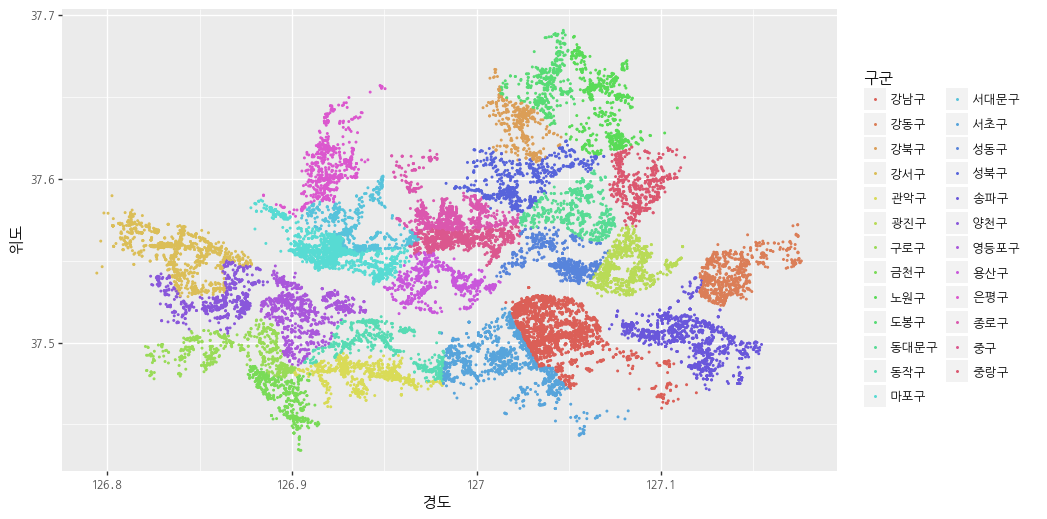

<ggplot: (695986643)>

In [42]:
(ggplot(shop_seoul_cafe, aes(x='경도', y='위도', color='구군'))
 + geom_point(size=0.2, alpha=1.0)
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + scale_fill_gradient(low='purple', high='red')
 )

<AxesSubplot:xlabel='경도', ylabel='위도'>

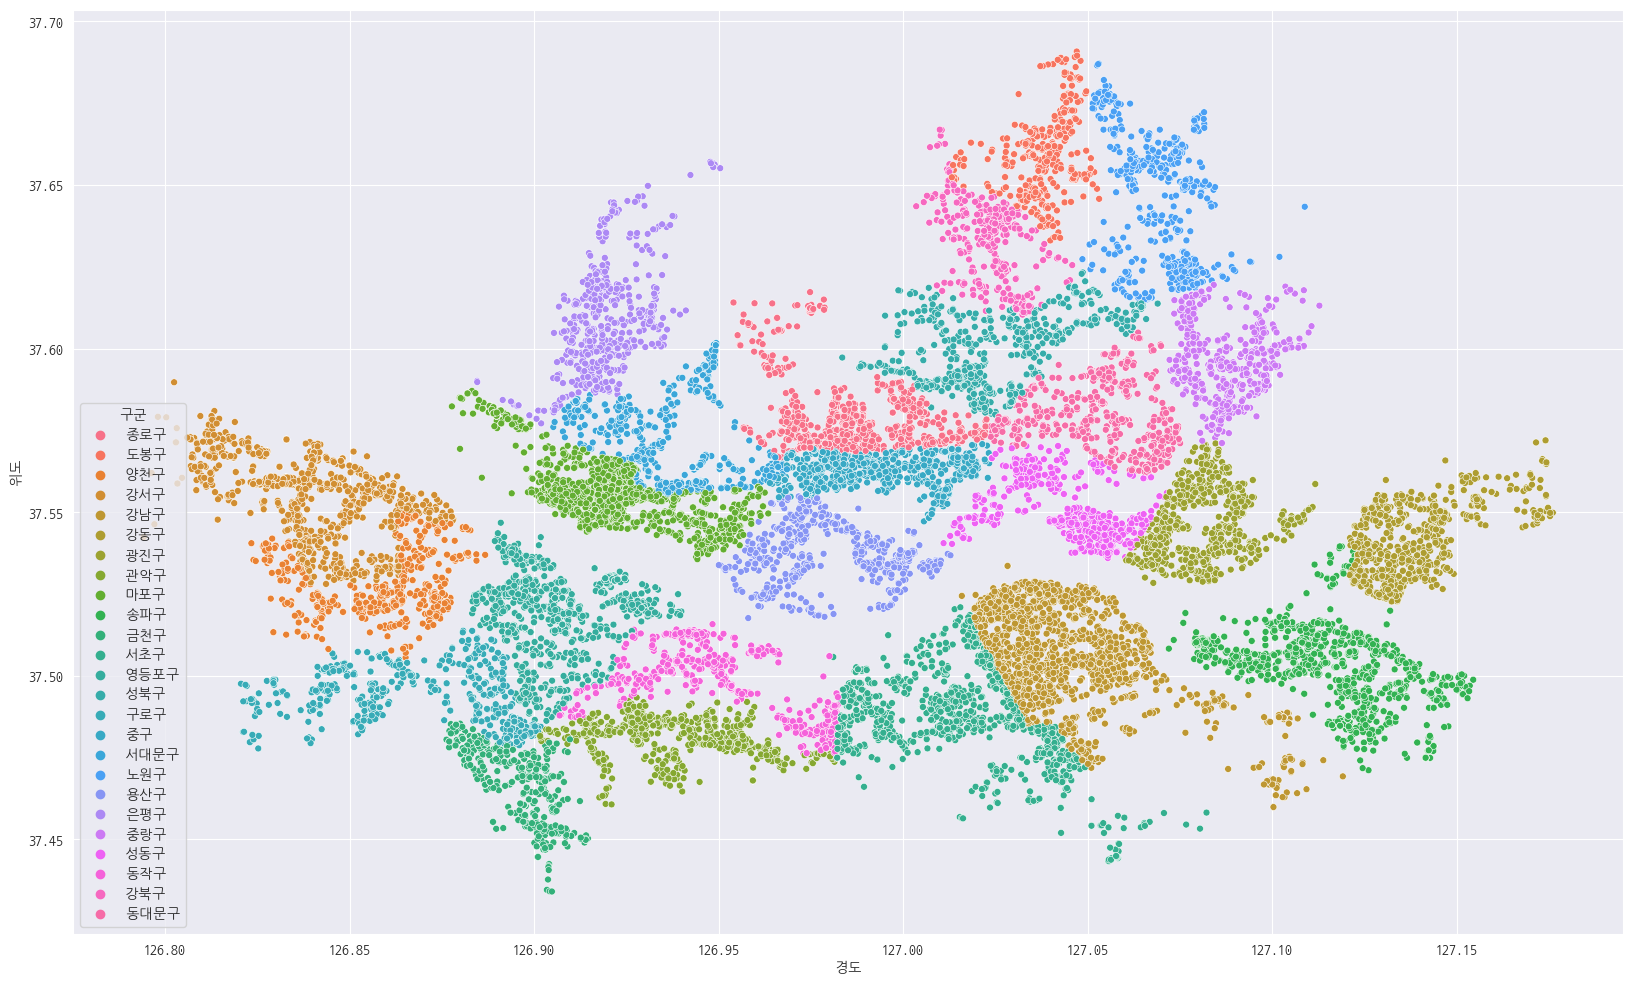

In [43]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data=shop_seoul_cafe, x='경도', y='위도', s=25, hue='구군')

In [69]:
data = shop_seoul_cafe[shop_seoul_cafe['상호명'].str.find('이디야') >= 0]
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')

for _, cafe in data.iterrows():
    popup = folium.Popup('{}: {}'.format(cafe['상호명'], cafe['도로명주소']), max_width=300)
    folium.CircleMarker(location=[cafe['위도'], cafe['경도']], popup=popup, radius=10, color='blue', fill_color='blue').add_to(cafe_map)

data = shop_seoul_cafe[shop_seoul_cafe['상호명'].str.find('스타벅스') >= 0]
for _, cafe in data.iterrows():
    popup = folium.Popup('{}: {}'.format(cafe['상호명'], cafe['도로명주소']), max_width=300)
    folium.CircleMarker(location=[cafe['위도'], cafe['경도']], popup=popup, radius=10, color='green', fill_color='green').add_to(cafe_map)

cafe_map.save('./output/cafe_map_ediya_starbucks.html')
cafe_map

In [45]:
shop_seoul_cafe = shop_seoul[shop_seoul.상권업종중분류명 == '커피점/카페']
shop_seoul_cafe.shape

(20842, 15)

In [81]:
shop_seoul_cafe_count = shop_seoul_cafe.groupby('구군').상호명.count()
print(type(shop_seoul_cafe_count))
shop_seoul_cafe_count

<class 'pandas.core.series.Series'>


구군
강남구     2191
강동구      764
강북구      384
강서구     1134
관악구      720
광진구      837
구로구      585
금천구      489
노원구      606
도봉구      389
동대문구     565
동작구      590
마포구     1637
서대문구     705
서초구     1205
성동구      694
성북구      731
송파구     1243
양천구      601
영등포구     969
용산구      726
은평구      609
종로구     1056
중구       901
중랑구      511
Name: 상호명, dtype: int64

In [82]:
shop_seoul_cafe_lat = shop_seoul_cafe.groupby('구군').위도.mean()
shop_seoul_cafe_lat.head()

구군
강남구   37.50621
강동구   37.54217
강북구   37.63260
강서구   37.55569
관악구   37.48056
Name: 위도, dtype: float64

In [83]:
shop_seoul_cafe_lot = shop_seoul_cafe.groupby('구군').경도.mean()
shop_seoul_cafe_lot.head()

구군
강남구   127.04462
강동구   127.13930
강북구   127.02329
강서구   126.83791
관악구   126.93970
Name: 경도, dtype: float64

In [84]:
shop_seoul_cafe_concat = pd.concat([shop_seoul_cafe_count, shop_seoul_cafe_lat, shop_seoul_cafe_lot], axis=1)
shop_seoul_cafe_concat.columns = ['매장수', '위도', '경도']
shop_seoul_cafe_concat.head()

매장수       위도        경도
구군                          
강남구  2191 37.50621 127.04462
강동구   764 37.54217 127.13930
강북구   384 37.63260 127.02329
강서구  1134 37.55569 126.83791
관악구   720 37.48056 126.93970

In [75]:
data = shop_seoul_cafe_concat
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')

for _, cafe in data.iterrows():
    popup = folium.Popup('{}: {:,.0F}'.format(_, cafe['매장수']), max_width=300)
    folium.CircleMarker(location=[cafe['위도'], cafe['경도']], popup=popup, radius=cafe['매장수'] / 35, color='purple', fill_color='purple').add_to(cafe_map)

cafe_map.save('./output/cafe_map.html')
cafe_map